In [1]:
import pandas as pd

dfA = pd.read_csv("C:/Users/balla/Downloads/FY2024P01-P12_All_FA_AccountBreakdownByPA-OC_2025-01-31_H04M42S04_1.csv")
dfB = pd.read_csv("C:/Users/balla/Downloads/FY2024P01-P12_All_FA_AccountBalances_2025-01-31_H04M42S02_1.csv")

In [2]:
print(dfA.head())
print("\nData info:")
print(dfA.info())
print("\nData description:")
print(dfA.describe())
print("\nCount null:")
print(dfA.isnull().sum())
print("\nCount duplicates:")
print(dfA.duplicated().sum())


  owning_agency_name reporting_agency_name submission_period  \
0       Access Board          Access Board         FY2024P12   
1       Access Board          Access Board         FY2024P12   
2       Access Board          Access Board         FY2024P12   
3       Access Board          Access Board         FY2024P12   
4       Access Board          Access Board         FY2024P12   

  agency_identifier_name            budget_function  \
0           Access Board  Administration of Justice   
1           Access Board  Administration of Justice   
2           Access Board  Administration of Justice   
3           Access Board  Administration of Justice   
4           Access Board  Administration of Justice   

                   budget_subfunction federal_account_symbol  \
0  Federal law enforcement activities               310-3200   
1  Federal law enforcement activities               310-3200   
2  Federal law enforcement activities               310-3200   
3  Federal law enforcement a

In [3]:
dfA = dfA[['owning_agency_name', 'reporting_agency_name', 'submission_period',
           'budget_function', 'budget_subfunction', 'federal_account_symbol', 
           'federal_account_name', 'program_activity_code', 'program_activity_name', 
           'obligations_incurred', 'obligations_undelivered_orders_unpaid_total', 
           'obligations_delivered_orders_unpaid_total', 'gross_outlay_amount_FYB', 
           'deobligations_or_recoveries_or_refunds_from_prior_year', 'last_modified_date']]


In [4]:
print("\nCount null:")
print(dfA.isnull().sum())
print("\nCheck duplicate values:")
print(dfA.duplicated().sum())


Count null:
owning_agency_name                                          0
reporting_agency_name                                       0
submission_period                                           0
budget_function                                             0
budget_subfunction                                          0
federal_account_symbol                                      0
federal_account_name                                        0
program_activity_code                                       0
program_activity_name                                     810
obligations_incurred                                        0
obligations_undelivered_orders_unpaid_total                 0
obligations_delivered_orders_unpaid_total                   0
gross_outlay_amount_FYB                                     0
deobligations_or_recoveries_or_refunds_from_prior_year      0
last_modified_date                                          0
dtype: int64

Check duplicate values:
1200


In [5]:
print(dfA[dfA["program_activity_name"].isnull()])

                         owning_agency_name  reporting_agency_name  \
760    Agency for International Development  Department of Defense   
10797                 Department of Defense  Department of Defense   
10798                 Department of Defense  Department of Defense   
10799                 Department of Defense  Department of Defense   
10800                 Department of Defense  Department of Defense   
...                                     ...                    ...   
48555        Department of Veterans Affairs  Department of Defense   
48556        Department of Veterans Affairs  Department of Defense   
48557        Department of Veterans Affairs  Department of Defense   
48558        Department of Veterans Affairs  Department of Defense   
48559        Department of Veterans Affairs  Department of Defense   

      submission_period                 budget_function  \
760           FY2024P12           International Affairs   
10797         FY2024P12                Na

In [6]:
print(dfA[dfA.duplicated()])

                          owning_agency_name  \
18     Administrative Conference of the U.S.   
105     Agency for International Development   
108     Agency for International Development   
116     Agency for International Development   
117     Agency for International Development   
...                                      ...   
58012           U.S. Agency for Global Media   
58013           U.S. Agency for Global Media   
58014           U.S. Agency for Global Media   
58059           U.S. Agency for Global Media   
58060           U.S. Agency for Global Media   

                       reporting_agency_name submission_period  \
18     Administrative Conference of the U.S.         FY2024P12   
105     Agency for International Development         FY2024P12   
108     Agency for International Development         FY2024P12   
116     Agency for International Development         FY2024P12   
117     Agency for International Development         FY2024P12   
...                        

In [7]:
dfA['program_activity_name'] = dfA.groupby('program_activity_code')['program_activity_name'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
print(dfA.isnull().sum())

owning_agency_name                                         0
reporting_agency_name                                      0
submission_period                                          0
budget_function                                            0
budget_subfunction                                         0
federal_account_symbol                                     0
federal_account_name                                       0
program_activity_code                                      0
program_activity_name                                     17
obligations_incurred                                       0
obligations_undelivered_orders_unpaid_total                0
obligations_delivered_orders_unpaid_total                  0
gross_outlay_amount_FYB                                    0
deobligations_or_recoveries_or_refunds_from_prior_year     0
last_modified_date                                         0
dtype: int64


C:\Users\balla\AppData\Local\Temp\ipykernel_24888\271401507.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dfA['program_activity_name'] = dfA.groupby('program_activity_code')['program_activity_name'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
C:\Users\balla\AppData\Local\Temp\ipykernel_24888\271401507.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfA['program_activity_name'] = dfA.groupby('program_activity_code')['program_activity_name'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


In [8]:
dfA['program_activity_name'].fillna("Unknown", inplace=True)
print(dfA.isnull().sum())

owning_agency_name                                        0
reporting_agency_name                                     0
submission_period                                         0
budget_function                                           0
budget_subfunction                                        0
federal_account_symbol                                    0
federal_account_name                                      0
program_activity_code                                     0
program_activity_name                                     0
obligations_incurred                                      0
obligations_undelivered_orders_unpaid_total               0
obligations_delivered_orders_unpaid_total                 0
gross_outlay_amount_FYB                                   0
deobligations_or_recoveries_or_refunds_from_prior_year    0
last_modified_date                                        0
dtype: int64


C:\Users\balla\AppData\Local\Temp\ipykernel_24888\1171344999.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfA['program_activity_name'].fillna("Unknown", inplace=True)


In [9]:
duplicate_counts = dfA.duplicated(subset=None, keep=False).sum()
print(f"Total Duplicate Rows: {duplicate_counts}")


Total Duplicate Rows: 1640


In [10]:
for col in dfA.columns:
    print(f"{col}: {dfA[col].duplicated().sum()} duplicates")


owning_agency_name: 58022 duplicates
reporting_agency_name: 57997 duplicates
submission_period: 58125 duplicates
budget_function: 58107 duplicates
budget_subfunction: 58056 duplicates
federal_account_symbol: 56165 duplicates
federal_account_name: 56173 duplicates
program_activity_code: 57731 duplicates
program_activity_name: 54082 duplicates
obligations_incurred: 12705 duplicates
obligations_undelivered_orders_unpaid_total: 22054 duplicates
obligations_delivered_orders_unpaid_total: 29201 duplicates
gross_outlay_amount_FYB: 53199 duplicates
deobligations_or_recoveries_or_refunds_from_prior_year: 32673 duplicates
last_modified_date: 58102 duplicates


In [11]:
dfA = dfA.drop_duplicates()
print(dfA.duplicated().sum())

0


In [12]:
dfA_agg = dfA.groupby(['owning_agency_name', 'reporting_agency_name', 
                       'federal_account_symbol', 'program_activity_code', 'last_modified_date']).agg({
    'submission_period': 'first',  
    'budget_function': 'first',  
    'budget_subfunction': 'first',  
    'federal_account_name': 'first',  
    'program_activity_name': 'first',  
    'obligations_incurred': 'sum',
    'obligations_undelivered_orders_unpaid_total': 'sum',
    'obligations_delivered_orders_unpaid_total': 'sum',
    'gross_outlay_amount_FYB': 'sum',
    'deobligations_or_recoveries_or_refunds_from_prior_year': 'sum'
}).reset_index()


In [13]:
print(f"Total Duplicate Rows After Aggregation: {dfA.duplicated().sum()}")

Total Duplicate Rows After Aggregation: 0


In [14]:
print(dfA.dtypes)

owning_agency_name                                         object
reporting_agency_name                                      object
submission_period                                          object
budget_function                                            object
budget_subfunction                                         object
federal_account_symbol                                     object
federal_account_name                                       object
program_activity_code                                      object
program_activity_name                                      object
obligations_incurred                                      float64
obligations_undelivered_orders_unpaid_total               float64
obligations_delivered_orders_unpaid_total                 float64
gross_outlay_amount_FYB                                   float64
deobligations_or_recoveries_or_refunds_from_prior_year    float64
last_modified_date                                         object
dtype: obj

In [15]:
dfA['last_modified_date'] = pd.to_datetime(dfA['last_modified_date'])

In [16]:
print(dfB.head())
print("\nData info:")
print(dfB.info())
print("\nData description:")
print(dfB.describe())
print("\nCount null:")
print(dfB.isnull().sum())
print("\nCount duplicates:")
print(dfB.duplicated().sum())

                  owning_agency_name              reporting_agency_name  \
0   Government Accountability Office   Government Accountability Office   
1                The Judicial Branch              Department of Justice   
2  Executive Office of the President  Executive Office of the President   
3  Executive Office of the President  Executive Office of the President   
4  Executive Office of the President  Executive Office of the President   

  submission_period federal_account_symbol  \
0         FY2024P12               005-0107   
1         FY2024P12               010-0930   
2         FY2024P12               011-0001   
3         FY2024P12               011-0030   
4         FY2024P12               011-0036   

                                federal_account_name  \
0  Salaries and Expenses, Government Accountabili...   
1  Court Security, Court of Appeals, District Cou...   
2  Compensation of the President, Executive Offic...   
3  Data-Driven Innovation, Funds Appropriated to

In [17]:
columns_to_keep_B = [
    'owning_agency_name', 'reporting_agency_name', 'submission_period',
    'federal_account_symbol', 'federal_account_name', 'budget_function',
    'budget_subfunction', 'total_budgetary_resources', 'obligations_incurred',
    'deobligations_or_recoveries_or_refunds_from_prior_year', 'unobligated_balance',
    'gross_outlay_amount', 'status_of_budgetary_resources_total', 'last_modified_date'
]
dfB = dfB[columns_to_keep_B]
print(dfB.columns)

Index(['owning_agency_name', 'reporting_agency_name', 'submission_period',
       'federal_account_symbol', 'federal_account_name', 'budget_function',
       'budget_subfunction', 'total_budgetary_resources',
       'obligations_incurred',
       'deobligations_or_recoveries_or_refunds_from_prior_year',
       'unobligated_balance', 'gross_outlay_amount',
       'status_of_budgetary_resources_total', 'last_modified_date'],
      dtype='object')


In [18]:
print("\nCount null:")
print(dfB.isnull().sum())
print("\nCheck duplicate values:")
print(dfB.duplicated().sum())


Count null:
owning_agency_name                                        0
reporting_agency_name                                     0
submission_period                                         0
federal_account_symbol                                    0
federal_account_name                                      0
budget_function                                           0
budget_subfunction                                        0
total_budgetary_resources                                 0
obligations_incurred                                      0
deobligations_or_recoveries_or_refunds_from_prior_year    0
unobligated_balance                                       0
gross_outlay_amount                                       0
status_of_budgetary_resources_total                       0
last_modified_date                                        0
dtype: int64

Check duplicate values:
0


In [19]:
print(dfB.head())

                  owning_agency_name              reporting_agency_name  \
0   Government Accountability Office   Government Accountability Office   
1                The Judicial Branch              Department of Justice   
2  Executive Office of the President  Executive Office of the President   
3  Executive Office of the President  Executive Office of the President   
4  Executive Office of the President  Executive Office of the President   

  submission_period federal_account_symbol  \
0         FY2024P12               005-0107   
1         FY2024P12               010-0930   
2         FY2024P12               011-0001   
3         FY2024P12               011-0030   
4         FY2024P12               011-0036   

                                federal_account_name  \
0  Salaries and Expenses, Government Accountabili...   
1  Court Security, Court of Appeals, District Cou...   
2  Compensation of the President, Executive Offic...   
3  Data-Driven Innovation, Funds Appropriated to

In [20]:
print(dfB.dtypes)


owning_agency_name                                         object
reporting_agency_name                                      object
submission_period                                          object
federal_account_symbol                                     object
federal_account_name                                       object
budget_function                                            object
budget_subfunction                                         object
total_budgetary_resources                                 float64
obligations_incurred                                      float64
deobligations_or_recoveries_or_refunds_from_prior_year    float64
unobligated_balance                                       float64
gross_outlay_amount                                       float64
status_of_budgetary_resources_total                       float64
last_modified_date                                         object
dtype: object


In [21]:
dfB['last_modified_date'] = pd.to_datetime(dfB['last_modified_date'])


In [22]:
print("dfA Columns:", dfA.columns)
print("\ndfB Columns:", dfB.columns)


dfA Columns: Index(['owning_agency_name', 'reporting_agency_name', 'submission_period',
       'budget_function', 'budget_subfunction', 'federal_account_symbol',
       'federal_account_name', 'program_activity_code',
       'program_activity_name', 'obligations_incurred',
       'obligations_undelivered_orders_unpaid_total',
       'obligations_delivered_orders_unpaid_total', 'gross_outlay_amount_FYB',
       'deobligations_or_recoveries_or_refunds_from_prior_year',
       'last_modified_date'],
      dtype='object')

dfB Columns: Index(['owning_agency_name', 'reporting_agency_name', 'submission_period',
       'federal_account_symbol', 'federal_account_name', 'budget_function',
       'budget_subfunction', 'total_budgetary_resources',
       'obligations_incurred',
       'deobligations_or_recoveries_or_refunds_from_prior_year',
       'unobligated_balance', 'gross_outlay_amount',
       'status_of_budgetary_resources_total', 'last_modified_date'],
      dtype='object')


In [23]:
# Merging dfA (Account Breakdown) with dfB (Account Balances) using a left join
merged_df = dfA.merge(dfB, 
                      on=['owning_agency_name', 'reporting_agency_name', 
                          'submission_period', 'federal_account_symbol', 
                          'federal_account_name', 'budget_function', 
                          'budget_subfunction', 'last_modified_date'], 
                      how='left', 
                      suffixes=('_breakdown', '_balances'))


from IPython.display import display

display(merged_df.head())



,owning_agency_name,reporting_agency_name,submission_period,budget_function,budget_subfunction,federal_account_symbol,federal_account_name,program_activity_code,program_activity_name,obligations_incurred_breakdown,...,obligations_delivered_orders_unpaid_total,gross_outlay_amount_FYB,deobligations_or_recoveries_or_refunds_from_prior_year_breakdown,last_modified_date,total_budgetary_resources,obligations_incurred_balances,deobligations_or_recoveries_or_refunds_from_prior_year_balances,unobligated_balance,gross_outlay_amount,status_of_budgetary_resources_total
0,Access Board,Access Board,FY2024P12,Administration of Justice,Federal law enforcement activities,310-3200,"Salaries and Expenses, Access Board",0001,SALARIES AND EXPENSES (DIRECT),3700062.97,...,78568.11,0.0,-5616.84,2024-11-05,12172850.89,8713121.61,11661.79,3459729.28,9473159.28,12172850.89
1,Access Board,Access Board,FY2024P12,Administration of Justice,Federal law enforcement activities,310-3200,"Salaries and Expenses, Access Board",0001,SALARIES AND EXPENSES (DIRECT),116841.72,...,0.00,0.0,0.00,2024-11-05,12172850.89,8713121.61,11661.79,3459729.28,9473159.28,12172850.89
2,Access Board,Access Board,FY2024P12,Administration of Justice,Federal law enforcement activities,310-3200,"Salaries and Expenses, Access Board",0001,SALARIES AND EXPENSES (DIRECT),158130.69,...,8750.00,0.0,0.00,2024-11-05,12172850.89,8713121.61,11661.79,3459729.28,9473159.28,12172850.89
3,Access Board,Access Board,FY2024P12,Administration of Justice,Federal law enforcement activities,310-3200,"Salaries and Expenses, Access Board",0001,SALARIES AND EXPENSES (DIRECT),1394544.92,...,31155.27,0.0,-1468.44,2024-11-05,12172850.89,8713121.61,11661.79,3459729.28,9473159.28,12172850.89
4,Access Board,Access Board,FY2024P12,Administration of Justice,Federal law enforcement activities,310-3200,"Salaries and Expenses, Access Board",0001,SALARIES AND EXPENSES (DIRECT),118370.43,...,15696.32,0.0,-802.28,2024-11-05,12172850.89,8713121.61,11661.79,3459729.28,9473159.28,12172850.89


In [24]:
print("Count Null:\n", merged_df.isnull().sum())
print("\nDuplicates:",merged_df.duplicated().sum())  


Count Null:
 owning_agency_name                                                     0
reporting_agency_name                                                  0
submission_period                                                      0
budget_function                                                        0
budget_subfunction                                                     0
federal_account_symbol                                                 0
federal_account_name                                                   0
program_activity_code                                                  0
program_activity_name                                                  0
obligations_incurred_breakdown                                         0
obligations_undelivered_orders_unpaid_total                            0
obligations_delivered_orders_unpaid_total                              0
gross_outlay_amount_FYB                                                0
deobligations_or_recoveries_or_refunds

In [25]:
print("Rows in dfA before merge:", len(dfA))
print(f"Rows in dfB before merge: {len(dfB)}")
print("Rows after merge:", len(merged_df))

Rows in dfA before merge: 56922
Rows in dfB before merge: 1961
Rows after merge: 56922


In [26]:
unmatched_accounts = dfA[~dfA['federal_account_symbol'].isin(dfB['federal_account_symbol'])]
print("Unmatched accounts:", unmatched_accounts['federal_account_symbol'].nunique())


Unmatched accounts: 0


In [27]:
columns_to_fill = [
    'total_budgetary_resources', 'obligations_incurred_balances',
    'deobligations_or_recoveries_or_refunds_from_prior_year_balances',
    'unobligated_balance', 'gross_outlay_amount',
    'status_of_budgetary_resources_total'
]

merged_df[columns_to_fill] = merged_df[columns_to_fill].fillna(0)


In [28]:
print(merged_df.isnull().sum())


owning_agency_name                                                  0
reporting_agency_name                                               0
submission_period                                                   0
budget_function                                                     0
budget_subfunction                                                  0
federal_account_symbol                                              0
federal_account_name                                                0
program_activity_code                                               0
program_activity_name                                               0
obligations_incurred_breakdown                                      0
obligations_undelivered_orders_unpaid_total                         0
obligations_delivered_orders_unpaid_total                           0
gross_outlay_amount_FYB                                             0
deobligations_or_recoveries_or_refunds_from_prior_year_breakdown    0
last_modified_date  

In [29]:
display(merged_df.head(10))

,owning_agency_name,reporting_agency_name,submission_period,budget_function,budget_subfunction,federal_account_symbol,federal_account_name,program_activity_code,program_activity_name,obligations_incurred_breakdown,...,obligations_delivered_orders_unpaid_total,gross_outlay_amount_FYB,deobligations_or_recoveries_or_refunds_from_prior_year_breakdown,last_modified_date,total_budgetary_resources,obligations_incurred_balances,deobligations_or_recoveries_or_refunds_from_prior_year_balances,unobligated_balance,gross_outlay_amount,status_of_budgetary_resources_total
0,Access Board,Access Board,FY2024P12,Administration of Justice,Federal law enforcement activities,310-3200,"Salaries and Expenses, Access Board",0001,SALARIES AND EXPENSES (DIRECT),3700062.97,...,78568.11,0.0,-5616.84,2024-11-05,12172850.89,8713121.61,11661.79,3459729.28,9473159.28,12172850.89
1,Access Board,Access Board,FY2024P12,Administration of Justice,Federal law enforcement activities,310-3200,"Salaries and Expenses, Access Board",0001,SALARIES AND EXPENSES (DIRECT),116841.72,...,0.00,0.0,0.00,2024-11-05,12172850.89,8713121.61,11661.79,3459729.28,9473159.28,12172850.89
2,Access Board,Access Board,FY2024P12,Administration of Justice,Federal law enforcement activities,310-3200,"Salaries and Expenses, Access Board",0001,SALARIES AND EXPENSES (DIRECT),158130.69,...,8750.00,0.0,0.00,2024-11-05,12172850.89,8713121.61,11661.79,3459729.28,9473159.28,12172850.89
3,Access Board,Access Board,FY2024P12,Administration of Justice,Federal law enforcement activities,310-3200,"Salaries and Expenses, Access Board",0001,SALARIES AND EXPENSES (DIRECT),1394544.92,...,31155.27,0.0,-1468.44,2024-11-05,12172850.89,8713121.61,11661.79,3459729.28,9473159.28,12172850.89
4,Access Board,Access Board,FY2024P12,Administration of Justice,Federal law enforcement activities,310-3200,"Salaries and Expenses, Access Board",0001,SALARIES AND EXPENSES (DIRECT),118370.43,...,15696.32,0.0,-802.28,2024-11-05,12172850.89,8713121.61,11661.79,3459729.28,9473159.28,12172850.89
5,Access Board,Access Board,FY2024P12,Administration of Justice,Federal law enforcement activities,310-3200,"Salaries and Expenses, Access Board",0001,SALARIES AND EXPENSES (DIRECT),733.09,...,347.22,0.0,0.00,2024-11-05,12172850.89,8713121.61,11661.79,3459729.28,9473159.28,12172850.89
6,Access Board,Access Board,FY2024P12,Administration of Justice,Federal law enforcement activities,310-3200,"Salaries and Expenses, Access Board",0001,SALARIES AND EXPENSES (DIRECT),726612.50,...,0.00,0.0,0.00,2024-11-05,12172850.89,8713121.61,11661.79,3459729.28,9473159.28,12172850.89
7,Access Board,Access Board,FY2024P12,Administration of Justice,Federal law enforcement activities,310-3200,"Salaries and Expenses, Access Board",0001,SALARIES AND EXPENSES (DIRECT),24534.40,...,9913.97,0.0,-0.36,2024-11-05,12172850.89,8713121.61,11661.79,3459729.28,9473159.28,12172850.89
8,Access Board,Access Board,FY2024P12,Administration of Justice,Federal law enforcement activities,310-3200,"Salaries and Expenses, Access Board",0001,SALARIES AND EXPENSES (DIRECT),366.21,...,0.00,0.0,0.00,2024-11-05,12172850.89,8713121.61,11661.79,3459729.28,9473159.28,12172850.89
9,Access Board,Access Board,FY2024P12,Administration of Justice,Federal law enforcement activities,310-3200,"Salaries and Expenses, Access Board",0001,SALARIES AND EXPENSES (DIRECT),1114090.15,...,170323.73,0.0,-794.69,2024-11-05,12172850.89,8713121.61,11661.79,3459729.28,9473159.28,12172850.89


In [30]:
merged_df['fiscal_year'] = merged_df['submission_period'].str.extract(r'FY(\d{4})')[0].astype(int)
merged_df['fiscal_month'] = merged_df['submission_period'].str.extract(r'P(\d{1,2})')[0].astype(int)

# Create a proper date column using these values
merged_df['submission_period'] = pd.to_datetime(merged_df['fiscal_year'].astype(str) + '-' + merged_df['fiscal_month'].astype(str) + '-01')

# Check the first few rows
display(merged_df.head())


,owning_agency_name,reporting_agency_name,submission_period,budget_function,budget_subfunction,federal_account_symbol,federal_account_name,program_activity_code,program_activity_name,obligations_incurred_breakdown,...,deobligations_or_recoveries_or_refunds_from_prior_year_breakdown,last_modified_date,total_budgetary_resources,obligations_incurred_balances,deobligations_or_recoveries_or_refunds_from_prior_year_balances,unobligated_balance,gross_outlay_amount,status_of_budgetary_resources_total,fiscal_year,fiscal_month
0,Access Board,Access Board,2024-12-01,Administration of Justice,Federal law enforcement activities,310-3200,"Salaries and Expenses, Access Board",0001,SALARIES AND EXPENSES (DIRECT),3700062.97,...,-5616.84,2024-11-05,12172850.89,8713121.61,11661.79,3459729.28,9473159.28,12172850.89,2024,12
1,Access Board,Access Board,2024-12-01,Administration of Justice,Federal law enforcement activities,310-3200,"Salaries and Expenses, Access Board",0001,SALARIES AND EXPENSES (DIRECT),116841.72,...,0.00,2024-11-05,12172850.89,8713121.61,11661.79,3459729.28,9473159.28,12172850.89,2024,12
2,Access Board,Access Board,2024-12-01,Administration of Justice,Federal law enforcement activities,310-3200,"Salaries and Expenses, Access Board",0001,SALARIES AND EXPENSES (DIRECT),158130.69,...,0.00,2024-11-05,12172850.89,8713121.61,11661.79,3459729.28,9473159.28,12172850.89,2024,12
3,Access Board,Access Board,2024-12-01,Administration of Justice,Federal law enforcement activities,310-3200,"Salaries and Expenses, Access Board",0001,SALARIES AND EXPENSES (DIRECT),1394544.92,...,-1468.44,2024-11-05,12172850.89,8713121.61,11661.79,3459729.28,9473159.28,12172850.89,2024,12
4,Access Board,Access Board,2024-12-01,Administration of Justice,Federal law enforcement activities,310-3200,"Salaries and Expenses, Access Board",0001,SALARIES AND EXPENSES (DIRECT),118370.43,...,-802.28,2024-11-05,12172850.89,8713121.61,11661.79,3459729.28,9473159.28,12172850.89,2024,12


In [31]:
print(merged_df[['submission_period', 'fiscal_year', 'fiscal_month']].head(10))


  submission_period  fiscal_year  fiscal_month
0        2024-12-01         2024            12
1        2024-12-01         2024            12
2        2024-12-01         2024            12
3        2024-12-01         2024            12
4        2024-12-01         2024            12
5        2024-12-01         2024            12
6        2024-12-01         2024            12
7        2024-12-01         2024            12
8        2024-12-01         2024            12
9        2024-12-01         2024            12


In [32]:
print(merged_df.head())

  owning_agency_name reporting_agency_name submission_period  \
0       Access Board          Access Board        2024-12-01   
1       Access Board          Access Board        2024-12-01   
2       Access Board          Access Board        2024-12-01   
3       Access Board          Access Board        2024-12-01   
4       Access Board          Access Board        2024-12-01   

             budget_function                  budget_subfunction  \
0  Administration of Justice  Federal law enforcement activities   
1  Administration of Justice  Federal law enforcement activities   
2  Administration of Justice  Federal law enforcement activities   
3  Administration of Justice  Federal law enforcement activities   
4  Administration of Justice  Federal law enforcement activities   

  federal_account_symbol                 federal_account_name  \
0               310-3200  Salaries and Expenses, Access Board   
1               310-3200  Salaries and Expenses, Access Board   
2          

In [33]:
# Group by fiscal year and month, summing obligations incurred
monthly_spending_df = merged_df.groupby(['fiscal_year', 'fiscal_month'])['obligations_incurred_balances'].sum().reset_index()
monthly_spending_df.rename(columns={'obligations_incurred_balances': 'monthly_spending'}, inplace=True)
print(monthly_spending_df.head(10))


   fiscal_year  fiscal_month  monthly_spending
0         2024            12      3.357303e+14


In [34]:
# Group by agency and sum obligations
agency_spending_df = merged_df.groupby("owning_agency_name")["obligations_incurred_balances"].sum().reset_index()
agency_spending_df.rename(columns={"obligations_incurred_balances": "total_spending_agencies"}, inplace=True)

# Sort agencies by total spending
agency_spending_df = agency_spending_df.sort_values(by="total_spending_agencies", ascending=False)
print(agency_spending_df.head(10))


                         owning_agency_name  total_spending_agencies
26                    Department of Defense             1.187133e+14
29  Department of Health and Human Services             4.603388e+13
36           Department of Veterans Affairs             2.586852e+13
41          Environmental Protection Agency             2.402972e+13
24                Department of Agriculture             2.342829e+13
30          Department of Homeland Security             2.056963e+13
97           Social Security Administration             1.140110e+13
28                     Department of Energy             8.290637e+12
34                      Department of State             6.216352e+12
19         Corps of Engineers - Civil Works             5.909277e+12


In [35]:
program_spending_df = merged_df.groupby("program_activity_name")["obligations_incurred_balances"].sum().reset_index()
program_spending_df.rename(columns={"obligations_incurred_balances": "top_spending_programs"}, inplace=True)
program_spending_df = program_spending_df.sort_values(by="top_spending_programs", ascending=False)
print(program_spending_df.head(10))

                                  program_activity_name  top_spending_programs
3125                                       REIMBURSABLE           1.405257e+13
3905                              VACCINES FOR CHILDREN           1.379149e+13
3855                                      UNDISTRIBUTED           7.761675e+12
1418  FEDERAL OLD-AGE AND SURVIVORS INSURANCE TRUST ...           6.562960e+12
3867                                      UNKNOWN/OTHER           6.358430e+12
330                            BASE/NON-MAJOR DISASTERS           6.042054e+12
392                      BUDGET ACTIVITY NOT APPLICABLE           5.852876e+12
78           ADMINISTRATION AND SERVICE-WIDE ACTIVITIES           5.660101e+12
257                                    APPLIED RESEARCH           5.305468e+12
85                                  ADMINISTRATION, SMI           5.260389e+12


In [36]:
category_spending_df = merged_df.groupby("budget_subfunction")["obligations_incurred_balances"].sum().reset_index()
category_spending_df.rename(columns={"obligations_incurred_balances": "top_spending_categories"}, inplace=True)
category_spending_df = category_spending_df.sort_values(by="top_spending_categories", ascending=False)
print(category_spending_df.head(10))

                        budget_subfunction  top_spending_categories
13          Department of Defense-Military             1.183179e+14
35                    Health care services             2.402540e+13
57         Pollution control and abatement             2.402027e+13
39  Hospital and medical care for veterans             1.847544e+13
47                                Medicare             1.497426e+13
27           Food and nutrition assistance             1.488582e+13
60                         Social security             1.032991e+13
25      Federal law enforcement activities             9.844862e+12
15           Disaster relief and insurance             9.008312e+12
68                         Water resources             6.871321e+12


In [37]:
print(merged_df[['obligations_incurred_balances']].describe())


       obligations_incurred_balances
count                   5.692200e+04
mean                    5.898076e+09
std                     2.673555e+10
min                     0.000000e+00
25%                     6.151222e+07
50%                     6.722042e+08
75%                     4.062048e+09
max                     1.312592e+12


In [38]:
from scipy import stats

# Compute Z-scores
merged_df['z_score'] = stats.zscore(merged_df['obligations_incurred_balances'])

# Filter for extreme outliers: Z-score above 3 or below -3
outliers_df = merged_df[(merged_df['z_score'] > 3) | (merged_df['z_score'] < -3)]
print(outliers_df[['owning_agency_name', 'federal_account_name', 'obligations_incurred_balances', 'z_score']].head(10))


             owning_agency_name  \
7024  Department of Agriculture   
7025  Department of Agriculture   
7026  Department of Agriculture   
7027  Department of Agriculture   
7028  Department of Agriculture   
7029  Department of Agriculture   
7030  Department of Agriculture   
7031  Department of Agriculture   
7032  Department of Agriculture   
7033  Department of Agriculture   

                                   federal_account_name  \
7024  Supplemental Nutrition Assistance Program, Foo...   
7025  Supplemental Nutrition Assistance Program, Foo...   
7026  Supplemental Nutrition Assistance Program, Foo...   
7027  Supplemental Nutrition Assistance Program, Foo...   
7028  Supplemental Nutrition Assistance Program, Foo...   
7029  Supplemental Nutrition Assistance Program, Foo...   
7030  Supplemental Nutrition Assistance Program, Foo...   
7031  Supplemental Nutrition Assistance Program, Foo...   
7032  Supplemental Nutrition Assistance Program, Foo...   
7033  Supplemental Nutri

In [39]:
Q1 = merged_df['obligations_incurred_balances'].quantile(0.25)
Q3 = merged_df['obligations_incurred_balances'].quantile(0.75)
IQR = Q3 - Q1

# Defining bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Finding outliers
iqr_outliers_df = merged_df[(merged_df['obligations_incurred_balances'] < lower_bound) | 
                            (merged_df['obligations_incurred_balances'] > upper_bound)]

# Displaingy detected outliers
print(iqr_outliers_df[['owning_agency_name', 'federal_account_name', 'obligations_incurred_balances']].head(10))


                    owning_agency_name  \
2845  Corps of Engineers - Civil Works   
2846  Corps of Engineers - Civil Works   
2847  Corps of Engineers - Civil Works   
2848  Corps of Engineers - Civil Works   
2849  Corps of Engineers - Civil Works   
2850  Corps of Engineers - Civil Works   
2851  Corps of Engineers - Civil Works   
2852  Corps of Engineers - Civil Works   
2853  Corps of Engineers - Civil Works   
2854  Corps of Engineers - Civil Works   

                           federal_account_name  obligations_incurred_balances  
2845  Revolving Fund, Corps of Engineers, Civil                   1.233991e+10  
2846  Revolving Fund, Corps of Engineers, Civil                   1.233991e+10  
2847  Revolving Fund, Corps of Engineers, Civil                   1.233991e+10  
2848  Revolving Fund, Corps of Engineers, Civil                   1.233991e+10  
2849  Revolving Fund, Corps of Engineers, Civil                   1.233991e+10  
2850  Revolving Fund, Corps of Engineers, Civil    

In [40]:
merged_outliers_df = pd.merge(outliers_df, iqr_outliers_df, on=["owning_agency_name", "federal_account_name"], how="inner")
print(merged_outliers_df.head())

          owning_agency_name    reporting_agency_name_x submission_period_x  \
0  Department of Agriculture  Department of Agriculture          2024-12-01   
1  Department of Agriculture  Department of Agriculture          2024-12-01   
2  Department of Agriculture  Department of Agriculture          2024-12-01   
3  Department of Agriculture  Department of Agriculture          2024-12-01   
4  Department of Agriculture  Department of Agriculture          2024-12-01   

  budget_function_x           budget_subfunction_x federal_account_symbol_x  \
0   Income Security  Food and nutrition assistance                 012-3505   
1   Income Security  Food and nutrition assistance                 012-3505   
2   Income Security  Food and nutrition assistance                 012-3505   
3   Income Security  Food and nutrition assistance                 012-3505   
4   Income Security  Food and nutrition assistance                 012-3505   

                                federal_account_na

In [41]:
merged_outliers_df = merged_outliers_df[['owning_agency_name', 'federal_account_name', 
                                         'obligations_incurred_balances_x', 'z_score_x']]
merged_outliers_df = merged_outliers_df.sort_values(by='z_score_x', ascending=False)
print(merged_outliers_df.head(10))


                   owning_agency_name  \
14498  Social Security Administration   
14497  Social Security Administration   
14496  Social Security Administration   
14495  Social Security Administration   
14494  Social Security Administration   
14493  Social Security Administration   
14492  Social Security Administration   
14491  Social Security Administration   
14487  Social Security Administration   
14499  Social Security Administration   

                                    federal_account_name  \
14498  Federal Old-Age and Survivors Insurance Trust ...   
14497  Federal Old-Age and Survivors Insurance Trust ...   
14496  Federal Old-Age and Survivors Insurance Trust ...   
14495  Federal Old-Age and Survivors Insurance Trust ...   
14494  Federal Old-Age and Survivors Insurance Trust ...   
14493  Federal Old-Age and Survivors Insurance Trust ...   
14492  Federal Old-Age and Survivors Insurance Trust ...   
14491  Federal Old-Age and Survivors Insurance Trust ...   
14487  F

In [42]:
# Flag outliers
merged_df['is_outlier'] = merged_df['obligations_incurred_balances'].apply(
    lambda x: 1 if x > upper_bound or x < lower_bound else 0
)

# Check flagged outliers
print(merged_df[['owning_agency_name', 'federal_account_name', 'obligations_incurred_balances', 'is_outlier']].head(10))


  owning_agency_name                 federal_account_name  \
0       Access Board  Salaries and Expenses, Access Board   
1       Access Board  Salaries and Expenses, Access Board   
2       Access Board  Salaries and Expenses, Access Board   
3       Access Board  Salaries and Expenses, Access Board   
4       Access Board  Salaries and Expenses, Access Board   
5       Access Board  Salaries and Expenses, Access Board   
6       Access Board  Salaries and Expenses, Access Board   
7       Access Board  Salaries and Expenses, Access Board   
8       Access Board  Salaries and Expenses, Access Board   
9       Access Board  Salaries and Expenses, Access Board   

   obligations_incurred_balances  is_outlier  
0                     8713121.61           0  
1                     8713121.61           0  
2                     8713121.61           0  
3                     8713121.61           0  
4                     8713121.61           0  
5                     8713121.61           0  

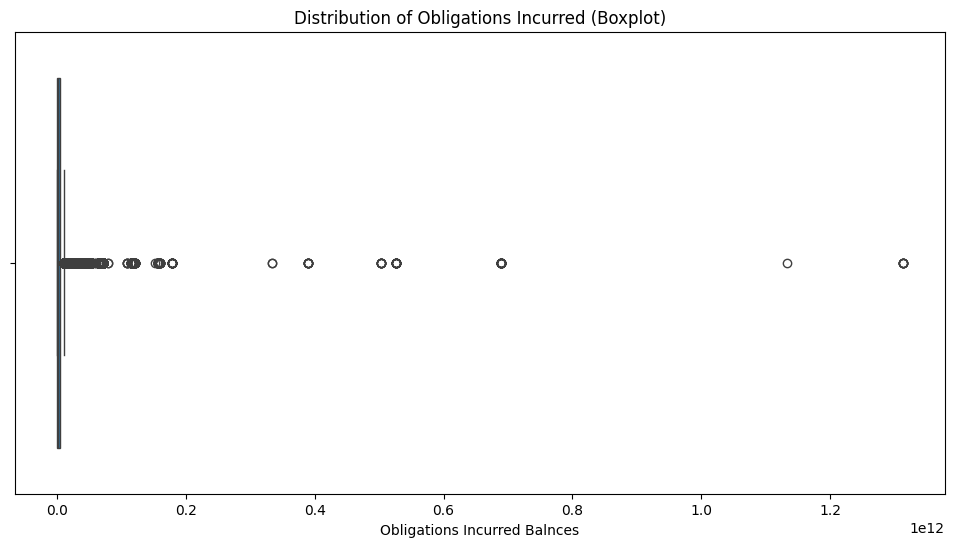

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.boxplot(x=merged_df["obligations_incurred_balances"])

plt.title("Distribution of Obligations Incurred (Boxplot)")
plt.xlabel("Obligations Incurred Balnces")

plt.show()

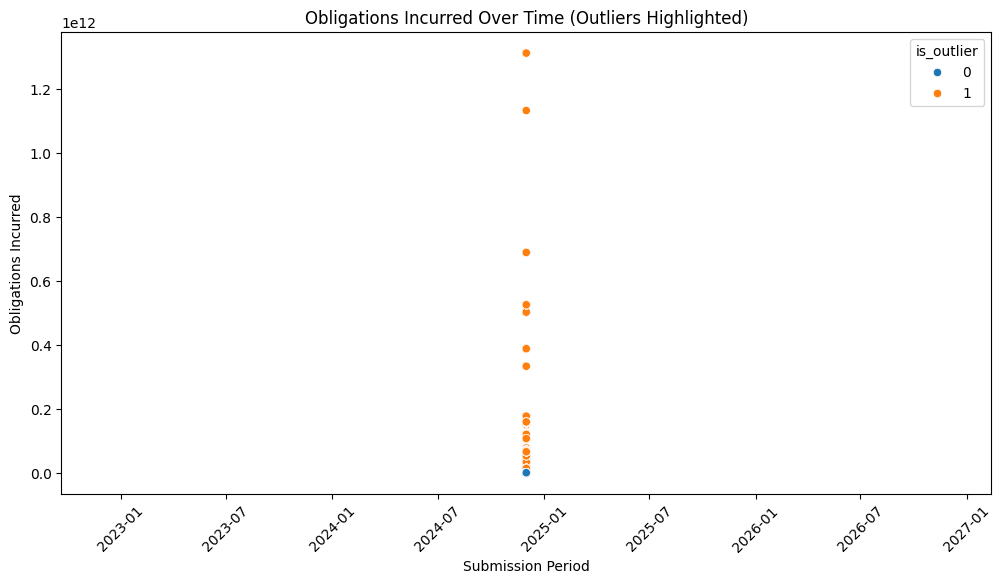

In [44]:
plt.figure(figsize=(12, 6))

# Scatter plot for spending over time
sns.scatterplot(x=merged_df["submission_period"], y=merged_df["obligations_incurred_balances"], hue=merged_df["is_outlier"])

plt.title("Obligations Incurred Over Time (Outliers Highlighted)")
plt.xlabel("Submission Period")
plt.ylabel("Obligations Incurred")
plt.xticks(rotation=45)
plt.show()


C:\Users\balla\AppData\Local\Temp\ipykernel_24888\3378083704.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=outliers_per_agency.values, y=outliers_per_agency.index, palette="viridis")


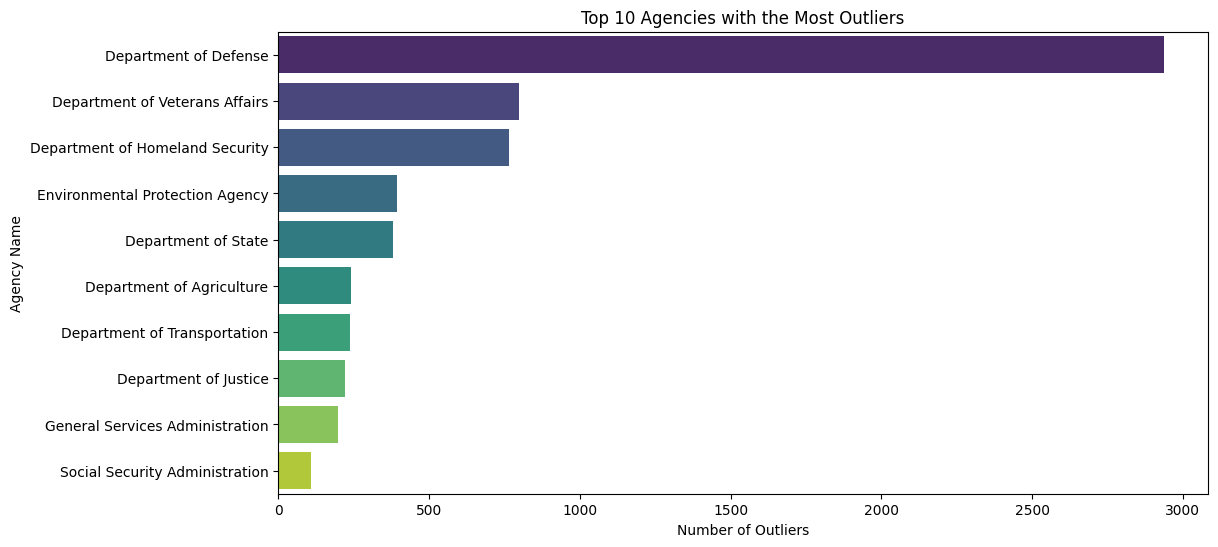

In [45]:
# Count number of outliers per agency
outliers_per_agency = merged_df[merged_df["is_outlier"] == 1]["owning_agency_name"].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=outliers_per_agency.values, y=outliers_per_agency.index, palette="viridis")
plt.title("Top 10 Agencies with the Most Outliers")
plt.xlabel("Number of Outliers")
plt.ylabel("Agency Name")
plt.show()


C:\Users\balla\AppData\Local\Temp\ipykernel_24888\1633956899.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=outliers_per_program.values, y=outliers_per_program.index, palette="viridis")


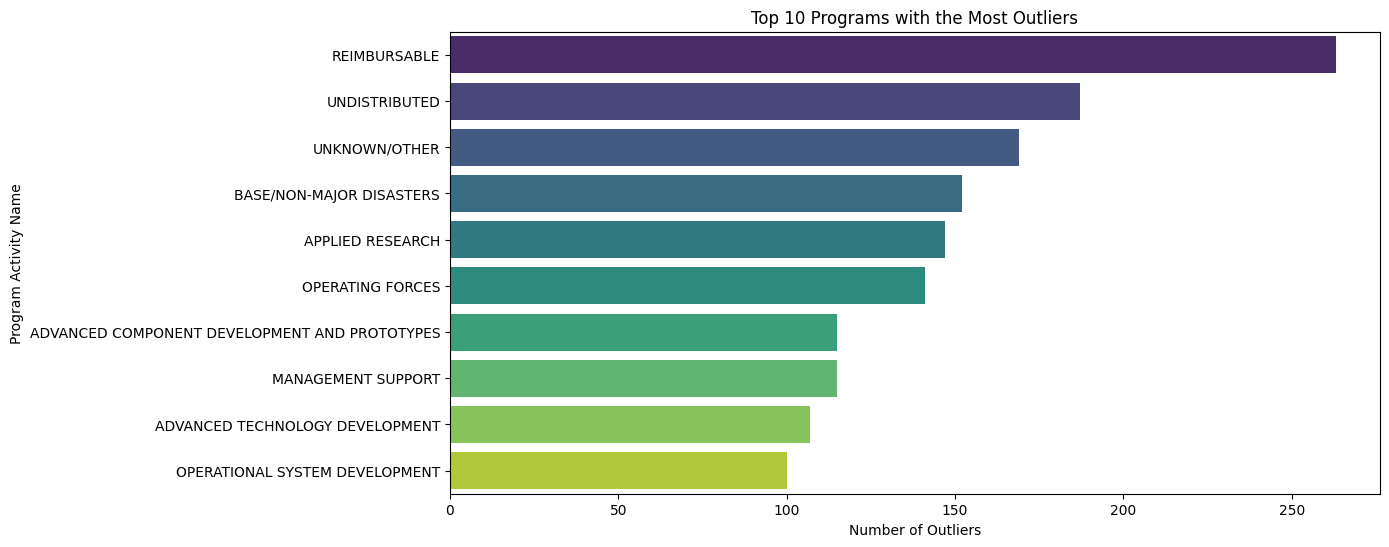

In [46]:
# Count number of outliers per program
outliers_per_program = merged_df[merged_df["is_outlier"] == 1]["program_activity_name"].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=outliers_per_program.values, y=outliers_per_program.index, palette="viridis")
plt.title("Top 10 Programs with the Most Outliers")
plt.xlabel("Number of Outliers")
plt.ylabel("Program Activity Name")
plt.show()

In [47]:
top_outlier_programs = outliers_per_program.index.tolist()
flagged_programs = merged_df[merged_df["program_activity_name"].isin(top_outlier_programs)]
agencies_by_program = flagged_programs.groupby(["owning_agency_name", "program_activity_name"])["obligations_incurred_balances"].sum().reset_index()
agencies_by_program = agencies_by_program.sort_values(by="obligations_incurred_balances", ascending=False)
print(agencies_by_program.head(10))

                 owning_agency_name  \
15            Department of Defense   
16            Department of Defense   
23  Department of Homeland Security   
11            Department of Defense   
13            Department of Defense   
9             Department of Defense   
12            Department of Defense   
14            Department of Defense   
10            Department of Defense   
18          Department of Education   

                            program_activity_name  \
15                                   REIMBURSABLE   
16                                  UNDISTRIBUTED   
23                       BASE/NON-MAJOR DISASTERS   
11                               APPLIED RESEARCH   
13                               OPERATING FORCES   
9   ADVANCED COMPONENT DEVELOPMENT AND PROTOTYPES   
12                             MANAGEMENT SUPPORT   
14                 OPERATIONAL SYSTEM DEVELOPMENT   
10                ADVANCED TECHNOLOGY DEVELOPMENT   
18                                  UNKN

In [48]:
ml_df = merged_df[[
    "obligations_incurred_balances",
    "federal_account_name",
    "owning_agency_name",
    "program_activity_name",
    "budget_subfunction",
    "submission_period",
    "fiscal_year",
    "fiscal_month",
    "total_budgetary_resources",
    "unobligated_balance",
    "is_outlier"
]]
print(ml_df.head())

   obligations_incurred_balances                 federal_account_name  \
0                     8713121.61  Salaries and Expenses, Access Board   
1                     8713121.61  Salaries and Expenses, Access Board   
2                     8713121.61  Salaries and Expenses, Access Board   
3                     8713121.61  Salaries and Expenses, Access Board   
4                     8713121.61  Salaries and Expenses, Access Board   

  owning_agency_name           program_activity_name  \
0       Access Board  SALARIES AND EXPENSES (DIRECT)   
1       Access Board  SALARIES AND EXPENSES (DIRECT)   
2       Access Board  SALARIES AND EXPENSES (DIRECT)   
3       Access Board  SALARIES AND EXPENSES (DIRECT)   
4       Access Board  SALARIES AND EXPENSES (DIRECT)   

                   budget_subfunction submission_period  fiscal_year  \
0  Federal law enforcement activities        2024-12-01         2024   
1  Federal law enforcement activities        2024-12-01         2024   
2  Feder

In [49]:
print(ml_df.info())
print(ml_df.isnull().sum())
print("\n")
print(ml_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56922 entries, 0 to 56921
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   obligations_incurred_balances  56922 non-null  float64       
 1   federal_account_name           56922 non-null  object        
 2   owning_agency_name             56922 non-null  object        
 3   program_activity_name          56922 non-null  object        
 4   budget_subfunction             56922 non-null  object        
 5   submission_period              56922 non-null  datetime64[ns]
 6   fiscal_year                    56922 non-null  int64         
 7   fiscal_month                   56922 non-null  int64         
 8   total_budgetary_resources      56922 non-null  float64       
 9   unobligated_balance            56922 non-null  float64       
 10  is_outlier                     56922 non-null  int64         
dtypes: datetime64[n

In [50]:
print(ml_df[ml_df.duplicated()].head(10))


    obligations_incurred_balances                 federal_account_name  \
1                      8713121.61  Salaries and Expenses, Access Board   
2                      8713121.61  Salaries and Expenses, Access Board   
3                      8713121.61  Salaries and Expenses, Access Board   
4                      8713121.61  Salaries and Expenses, Access Board   
5                      8713121.61  Salaries and Expenses, Access Board   
6                      8713121.61  Salaries and Expenses, Access Board   
7                      8713121.61  Salaries and Expenses, Access Board   
8                      8713121.61  Salaries and Expenses, Access Board   
9                      8713121.61  Salaries and Expenses, Access Board   
10                     8713121.61  Salaries and Expenses, Access Board   

   owning_agency_name           program_activity_name  \
1        Access Board  SALARIES AND EXPENSES (DIRECT)   
2        Access Board  SALARIES AND EXPENSES (DIRECT)   
3        Acces

In [51]:
ml_df = ml_df.drop_duplicates()
print("Duplicates removed. Remaining rows:", ml_df.shape[0])


Duplicates removed. Remaining rows: 6450


In [52]:
print(ml_df.duplicated().sum())  


0


In [53]:
print(ml_df.isnull().sum())


obligations_incurred_balances    0
federal_account_name             0
owning_agency_name               0
program_activity_name            0
budget_subfunction               0
submission_period                0
fiscal_year                      0
fiscal_month                     0
total_budgetary_resources        0
unobligated_balance              0
is_outlier                       0
dtype: int64


In [54]:
print(ml_df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 6450 entries, 0 to 56914
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   obligations_incurred_balances  6450 non-null   float64       
 1   federal_account_name           6450 non-null   object        
 2   owning_agency_name             6450 non-null   object        
 3   program_activity_name          6450 non-null   object        
 4   budget_subfunction             6450 non-null   object        
 5   submission_period              6450 non-null   datetime64[ns]
 6   fiscal_year                    6450 non-null   int64         
 7   fiscal_month                   6450 non-null   int64         
 8   total_budgetary_resources      6450 non-null   float64       
 9   unobligated_balance            6450 non-null   float64       
 10  is_outlier                     6450 non-null   int64         
dtypes: datetime64[ns](1),

In [55]:
categorical_cols = ["federal_account_name", "owning_agency_name", "program_activity_name", "budget_subfunction"]

ml_df = pd.get_dummies(ml_df, columns=categorical_cols, drop_first=True, dtype=int)
print("Dataset after One-Hot Encoding:")
print(ml_df.head())

Dataset after One-Hot Encoding:
    obligations_incurred_balances submission_period  fiscal_year  \
0                      8713121.61        2024-12-01         2024   
17                     3605664.47        2024-12-01         2024   
18                     3605664.47        2024-12-01         2024   
32                    11045796.28        2024-12-01         2024   
33                    11045796.28        2024-12-01         2024   

    fiscal_month  total_budgetary_resources  unobligated_balance  is_outlier  \
0             12                12172850.89           3459729.28           0   
17            12                 3717646.52            111982.05           0   
18            12                 3717646.52            111982.05           0   
32            12                13374854.23           2329057.95           0   
33            12                13374854.23           2329057.95           0   

    federal_account_name_9-11 Response and Biometric Exit Account, U.S. Custom

In [56]:
from sklearn.model_selection import train_test_split

# Dropping unnecessary columns 
X = ml_df.drop(columns=["is_outlier", "submission_period", "fiscal_year", "fiscal_month"])  # ✅ FIXED

# Define the target variable
y = ml_df["is_outlier"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check sizes
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (5160, 6170)
Testing set size: (1290, 6170)


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lr_model = LogisticRegression(class_weight="balanced")
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

print("Prediction:\n", y_pred)

print("\nAccuracy:\n", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Prediction:
 [1 1 1 ... 1 0 1]

Accuracy:
 0.3263565891472868

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.25      0.40      1158
           1       0.13      1.00      0.23       132

    accuracy                           0.33      1290
   macro avg       0.57      0.62      0.32      1290
weighted avg       0.91      0.33      0.38      1290


Confusion Matrix:
 [[289 869]
 [  0 132]]


In [58]:
from sklearn.ensemble import RandomForestClassifier

# Initializing the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluating the model
print("\nAccuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))




Accuracy: 0.9992248062015504

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1158
           1       1.00      0.99      1.00       132

    accuracy                           1.00      1290
   macro avg       1.00      1.00      1.00      1290
weighted avg       1.00      1.00      1.00      1290


Confusion Matrix:
 [[1158    0]
 [   1  131]]


In [59]:
feature_importances = pd.DataFrame(
    rf_model.feature_importances_,
    index=X_train.columns,
    columns=["importance"]
).sort_values(by="importance", ascending=False)

print(feature_importances.head(10))

                                                    importance
obligations_incurred_balances                         0.305614
total_budgetary_resources                             0.222566
unobligated_balance                                   0.094024
budget_subfunction_Department of Defense-Military     0.017250
federal_account_name_State and Tribal Assistanc...    0.016346
owning_agency_name_Department of Defense              0.013527
owning_agency_name_Department of the Interior         0.009404
owning_agency_name_Department of Veterans Affairs     0.008814
budget_subfunction_Food and nutrition assistance      0.008282
federal_account_name_Operations and Support, U....    0.006642


In [60]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring="accuracy")
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Accuracy Scores: [0.99903101 1.         0.99903101 0.99806202 1.        ]
Mean CV Accuracy: 0.9992248062015504


C:\Users\balla\AppData\Local\Temp\ipykernel_24888\200285959.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=outlier_counts.index, y=outlier_counts.values, palette="viridis")


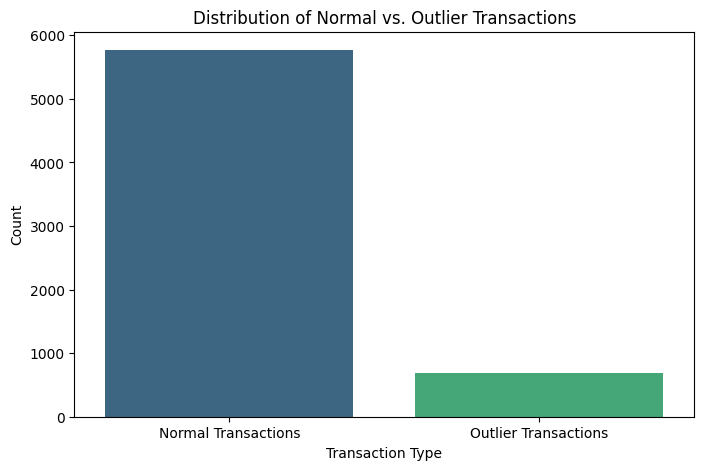

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of normal (0) vs outlier (1) transactions
outlier_counts = ml_df["is_outlier"].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=outlier_counts.index, y=outlier_counts.values, palette="viridis")
plt.xticks(ticks=[0, 1], labels=["Normal Transactions", "Outlier Transactions"])
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.title("Distribution of Normal vs. Outlier Transactions")
plt.show()


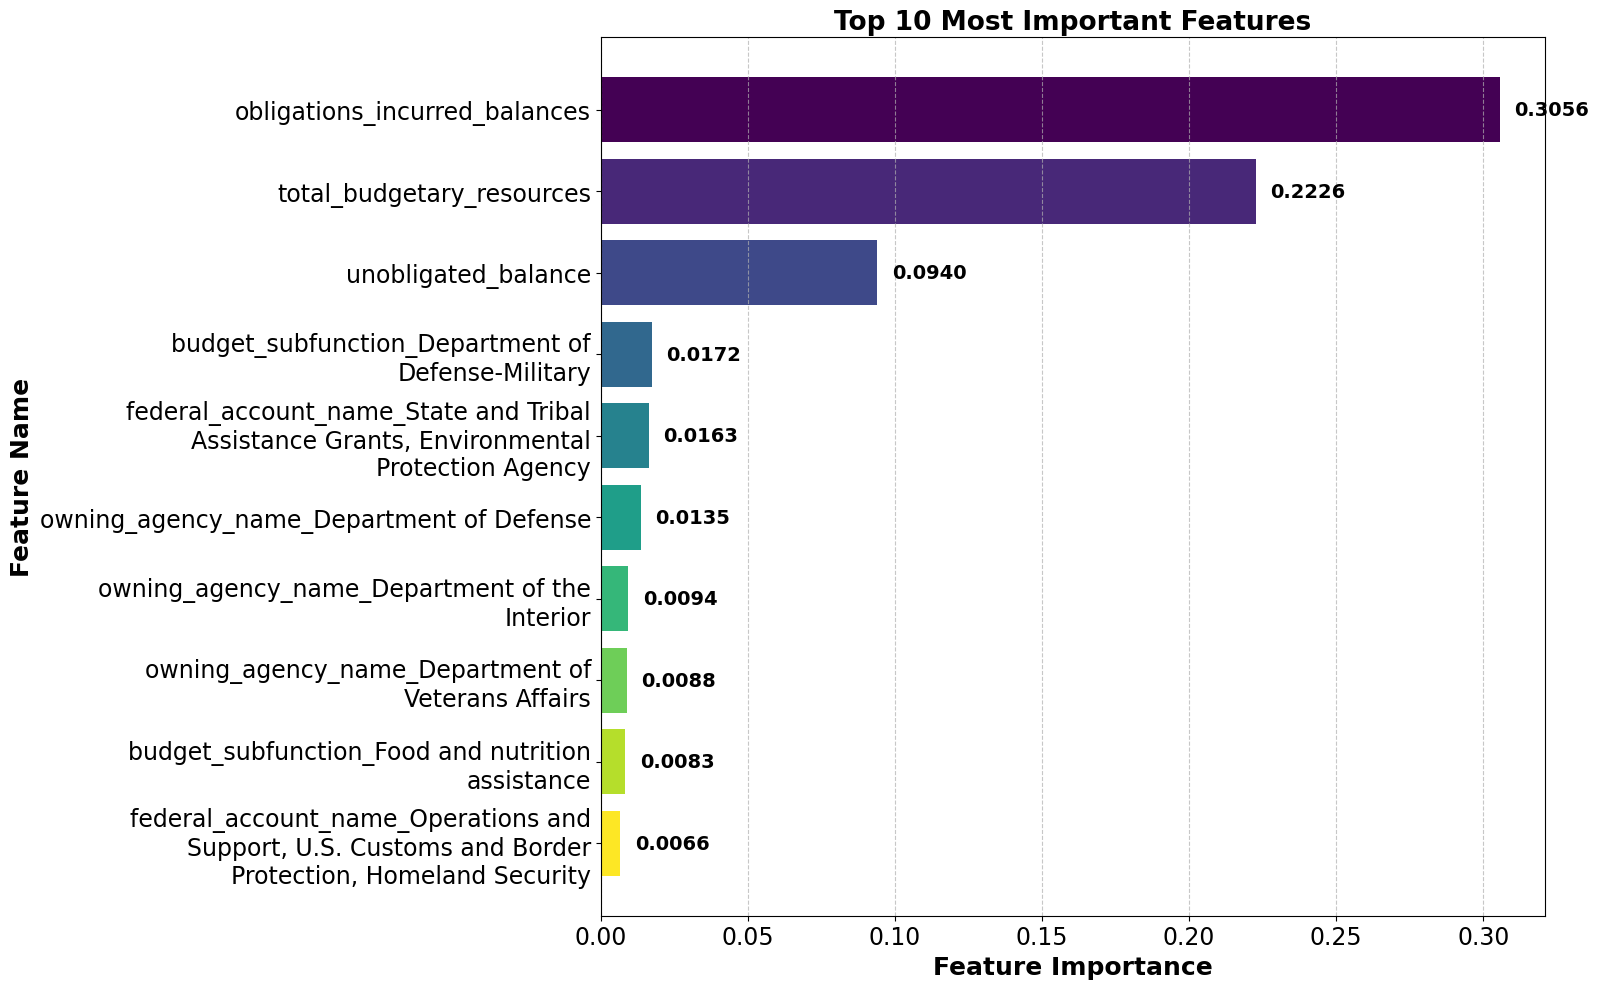

In [62]:
import textwrap  
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
})


top_features = feature_importances.sort_values(by="Importance", ascending=False).head(10)

plt.figure(figsize=(16, 10))


features = [textwrap.fill(f, width=40) for f in top_features['Feature']]
importances = top_features['Importance']

# Generate unique colors for each bar
colors = plt.cm.viridis(np.linspace(0, 1, len(features)))

# Horizontal bar chart with different colors
bars = plt.barh(features, importances, color=colors)

# Data labels on bars
for bar, value in zip(bars, importances):
    plt.text(value + 0.005, bar.get_y() + bar.get_height()/2, f'{value:.4f}', 
             fontsize=14, va='center', fontweight='bold', color='black')


plt.xlabel("Feature Importance", fontsize=18, fontweight='bold')
plt.ylabel("Feature Name", fontsize=18, fontweight='bold')
plt.title("Top 10 Most Important Features", fontsize=19, fontweight='bold')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()



In [63]:
# Predictions on training data
y_train_pred = rf_model.predict(X_train)

# Evaluate accuracy on training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train Accuracy: {train_accuracy:.4f}")

# Predictions on test data
y_test_pred = rf_model.predict(X_test)

# Evaluate accuracy on test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nTest Accuracy: {test_accuracy:.4f}")



Train Accuracy: 1.0000

Test Accuracy: 0.9992


In [64]:
feature_importances = pd.DataFrame(
    rf_model.feature_importances_,
    index=X_train.columns,
    columns=["importance"]
).sort_values(by="importance", ascending=False)

print(feature_importances.head(10))

                                                    importance
obligations_incurred_balances                         0.305614
total_budgetary_resources                             0.222566
unobligated_balance                                   0.094024
budget_subfunction_Department of Defense-Military     0.017250
federal_account_name_State and Tribal Assistanc...    0.016346
owning_agency_name_Department of Defense              0.013527
owning_agency_name_Department of the Interior         0.009404
owning_agency_name_Department of Veterans Affairs     0.008814
budget_subfunction_Food and nutrition assistance      0.008282
federal_account_name_Operations and Support, U....    0.006642


In [ ]:
import joblib

joblib.dump(rf_model, "rf_model.pkl")

print("Model saved successfully!")


In [ ]:
print(merged_df.columns)

In [ ]:
merged_df.to_excel('federal_spending_data.xlsx', index=False, engine='openpyxl')
